<a href="https://colab.research.google.com/github/MrsPomodoro/MMA_Dataset/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the data

**Dataset MMA:**  We are working with the cleaned dataset provided in the task assignment in the Materials section.

**Attributes in the Dataset:**
**Data Description**

| **Column Name** | **Data Type** | **Description** |
|-----------------|---------------|-----------------|
| Identifier      | int64         | A unique identifier for each patient or sample. |
| Source          | int64         | Indicates the source of the data, possibly denoting whether the data came from primary care, a hospital, or another facility. |
| LIS             | int64         | Likely related to the Laboratory Information System, possibly denoting the system or lab where the data was processed. |
| Leeftijd        | int64         | The age of the patient. |
| Geslacht        | int64         | The gender of the patient (likely coded as 0 for female, 1 for male). |
| KR              | float64       | Possibly related to kidney function or another clinical measure (exact meaning needs clarification). |
| eGFR            | float64       | Estimated Glomerular Filtration Rate, a key indicator of kidney function. |
| VITB12          | float64       | Vitamin B12 levels, critical for diagnosing vitamin B12 deficiency. |
| MMZ             | float64       | Methylmalonic Acid (MMA) levels, which can indicate vitamin B12 deficiency or metabolic disorders. |
| Classificatie_MMZ | int64       | A classification or categorization related to MMA levels. |
| Anemie          | float64       | Presence of anemia, possibly coded with a binary or categorical system. |
| vHB, MCV, MCH, MCHC, RDW | float64 | Hemoglobin, Mean Corpuscular Volume, Mean Corpuscular Hemoglobin, Mean Corpuscular Hemoglobin Concentration, and Red Cell Distribution Width, all of which are indicators related to red blood cell health and anemia. |
| RBC, WBC, PLT   | float64       | Red Blood Cell count, White Blood Cell count, and Platelet count, key indicators of overall blood health and immune function. |
| RETI, NEUTRO, LYMFO, MONO, BASO, EO | float64 | Reticulocytes, Neutrophils, Lymphocytes, Monocytes, Basophils, and Eosinophils, representing different components of the white blood cell differential, indicating immune status and possible infections or inflammation. |
| IJzergebrek, FERRITINE, CRP, TSAT, TRF, FE, BSE | float64 | Indicators related to iron status (e.g., iron deficiency, ferritin levels), inflammation (C-reactive protein), and overall iron metabolism. |
| FOLIUMZUUR, FZ_deficiency | float64 | Folate (folic acid) levels and indicators of folate deficiency. |
| LDH, HAPTO, Hemolyse | float64 | Lactate dehydrogenase, Haptoglobin, and Hemolysis indicators, used to assess cell damage or hemolysis. |
| RET_HE, RBC_HE, DELTA_HE, HYPER_HE, HYPO_HE, HFR, IRF, MFR, LFR | float64 | Indicators related to red blood cell hemoglobin content and distribution, as well as red blood cell production (e.g., Hypo/Hyper chromic RBCs). |


# Medical Information Derivable from the Dataset



###**Quality of data**

- generate the table showing the missing values and their percentages for each of the key medical information *categories*

In [60]:
import pandas as pd

#load cleaned data source
mma_data = pd.read_csv('/content/cleaned_data/MMZ_cleaned.csv')

# Define the columns of interest for each medical category
columns_of_interest = {
    "Vitamin B12 Deficiency": ["VITB12", "MMZ"],
    "Kidney Function": ["eGFR"],
    "Anemia Types": ["HB", "MCV", "MCH"],
    "Iron Status": ["FERRITINE", "CRP", "TSAT", "TRF", "FE"],
    "Immune System Status": ["WBC", "NEUTRO", "LYMFO", "MONO", "BASO", "EO"],
    "Folate Deficiency": ["FOLIUMZUUR"],
    "Hemolytic Disorders": ["LDH", "HAPTO", "Hemolyse"],
    "Red Blood Cell Health": ["RET_HE", "RBC_HE", "DELTA_HE", "HYPER_HE", "HYPO_HE"]
}

# Initialize an empty list to store the results
data_quality = []

# Total number of rows in the dataset
total_entries = len(mma_data)

# Calculate missing values and percentages
for info, columns in columns_of_interest.items():
    for col in columns:
        missing_count = mma_data[col].isnull().sum()
        missing_percentage = (missing_count / total_entries) * 100
        data_quality.append([info, col, missing_count, f"{missing_percentage:.2f}%"])

# Convert the result to a DataFrame
data_quality_df = pd.DataFrame(data_quality, columns=["Medical Information", "Column", "Missing Values", "Percentage"])

# Display the results
print(data_quality_df)

# Save the results to a CSV file
data_quality_df.to_csv("/content/quality_of_data/data_quality_summary.csv", index=False)


       Medical Information      Column  Missing Values Percentage
0   Vitamin B12 Deficiency      VITB12             341      2.39%
1   Vitamin B12 Deficiency         MMZ               0      0.00%
2          Kidney Function        eGFR            1152      8.08%
3             Anemia Types          HB            6896     48.39%
4             Anemia Types         MCV            6897     48.39%
5             Anemia Types         MCH            7548     52.96%
6              Iron Status   FERRITINE           10786     75.68%
7              Iron Status         CRP            8564     60.09%
8              Iron Status        TSAT           12488     87.62%
9              Iron Status         TRF           12467     87.48%
10             Iron Status          FE           12426     87.19%
11    Immune System Status         WBC            7078     49.66%
12    Immune System Status      NEUTRO            7620     53.47%
13    Immune System Status       LYMFO            7620     53.47%
14    Immu

| **Medical Information**    | **Missing Values**                                                                            | **Conclusion**                                                                 |
|----------------------------|-----------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Vitamin B12 Deficiency**  | VITB12 (2.39%), MMZ (0.00%)                                                                   | Analysis fully feasible; minimal missing data.                                 |
| **Kidney Function**         | eGFR (8.08%)                                                                                 | Analysis feasible; minor missing data.                                         |
| **Anemia Types**            | HB (48.39%), MCV (48.39%), MCH (52.96%)                                                      | Limited; significant missing data, especially in MCH.                         |
| **Iron Status**             | FERRITINE (75.68%), CRP (60.09%), TSAT (87.62%), TRF (87.48%), FE (87.19%)                   | Compromised; extensive missing data across indicators.                        |
| **Immune System Status**    | WBC (49.66%), NEUTRO (53.47%), LYMFO (53.47%), MONO (53.47%), BASO (53.47%), EO (53.45%)     | Limited; over half of the data is missing.                                    |
| **Folate Deficiency**       | FOLIUMZUUR (72.54%)                                                                          | Highly compromised; substantial missing data.                                  |
| **Hemolytic Disorders**     | LDH (82.51%), HAPTO (99.64%), Hemolyse (84.31%)                                              | Severely limited; over 82% missing data.                                       |
| **Red Blood Cell Health**   | RET_HE (95.88%), RBC_HE (95.88%), DELTA_HE (97.92%), HYPER_HE (97.92%), HYPO_HE (97.92%)     | Highly compromised; most indicators missing over 95%.                          |

**Overall Conclusion:**

- Reliable Analysis: The dataset provides reasonably reliable data for
  1. Vitamin B12 Deficiency: This is the strongest candidate for analysis since the data is nearly complete. No significant imputation is needed, making it ideal for direct analysis or machine learning (ML) modeling.
  2. Kidney Function: With only 8% missing data, this area can be analyzed after applying simple imputation methods like mean imputation. It could yield reliable insights and be a good target for ML models.
  3. Anemia Types: This category have substantial missing data but could be addressed with advanced imputation techniques or by focusing on specific variables with fewer missing values.

- Compromised Analysis: For most other medical attributes, especially iron status, immune system status, folate deficiency, hemolytic disorders, and red blood cell health, the high proportion of missing data severely limits the reliability of any analysis. In many cases, the missing data exceeds 80%, making it nearly impossible to conduct meaningful analyses.

 ### **Choosing imputation method**

1. **For Low Missing Data (< 5%):**

*Attributes:* Vitamin B12 (2.39%)

*Suggested Method:* Mean/Median Imputation or Mode Imputation (for categorical data).

*Reasoning:* With such a small percentage of missing data, simple methods like mean, median, or mode imputation will likely suffice without significantly altering the dataset's distribution. These methods are straightforward and effective when the missing data is minimal.


2. **For Moderate Missing Data (5% - 30%):**

*Attributes:* Kidney Function (eGFR - 8.08%)

*Suggested Method:* Mean/Median Imputation.

*Reasoning:* The missing data is moderate, making mean or median imputation a practical choice. These methods will help retain the dataset's integrity while filling in the missing values without introducing significant bias.

3. For High Missing Data (> 50%):

*Attributes:* HB (48.39%), MCV (48.39%), MCH (52.96%)

*Suggested Method:* Multiple Imputation by Chained Equations (MICE)

*Reasoning:* MICE is ideal for attributes with over 50% missing data. It generates multiple imputed datasets, considering variable relationships and accounting for uncertainty, making it suitable for complex datasets with significant gaps.


#### **Mean/Median Imputation**

In [72]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Create the imputer object with strategy 'mean'
mean_imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the VITB12 column
mma_data['VITB12'] = mean_imputer.fit_transform(mma_data[['VITB12']])

# Apply the imputer to the eGFR column
mma_data['eGFR'] = mean_imputer.fit_transform(mma_data[['eGFR']])

# Check the results
print("Missing values in VITB12 after imputation:", mma_data['VITB12'].isnull().sum())
print("Missing values in eGFR after imputation:", mma_data['eGFR'].isnull().sum())


# Save the results to a CSV file
mma_data.to_csv("/content/quality_of_data/data_imputation.csv", index=False)


Missing values in VITB12 after imputation: 0
Missing values in eGFR after imputation: 0


####**Multiple Imputation by Chained Equations (MICE)**

In [73]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the columns with high missing data
columns_to_impute = ['HB', 'MCV', 'MCH']

# Create the MICE imputer object
mice_imputer = IterativeImputer(random_state=0)

# Apply the imputer to the selected columns
mma_data[columns_to_impute] = mice_imputer.fit_transform(mma_data[columns_to_impute])

# Check the results
for column in columns_to_impute:
    print(f"Missing values in {column} after MICE imputation:", mma_data[column].isnull().sum())


# Save the results to a CSV file
mma_data.to_csv("/content/quality_of_data/data_imputation.csv", index=False)


Missing values in HB after MICE imputation: 0
Missing values in MCV after MICE imputation: 0
Missing values in MCH after MICE imputation: 0


**Correlation matrix**

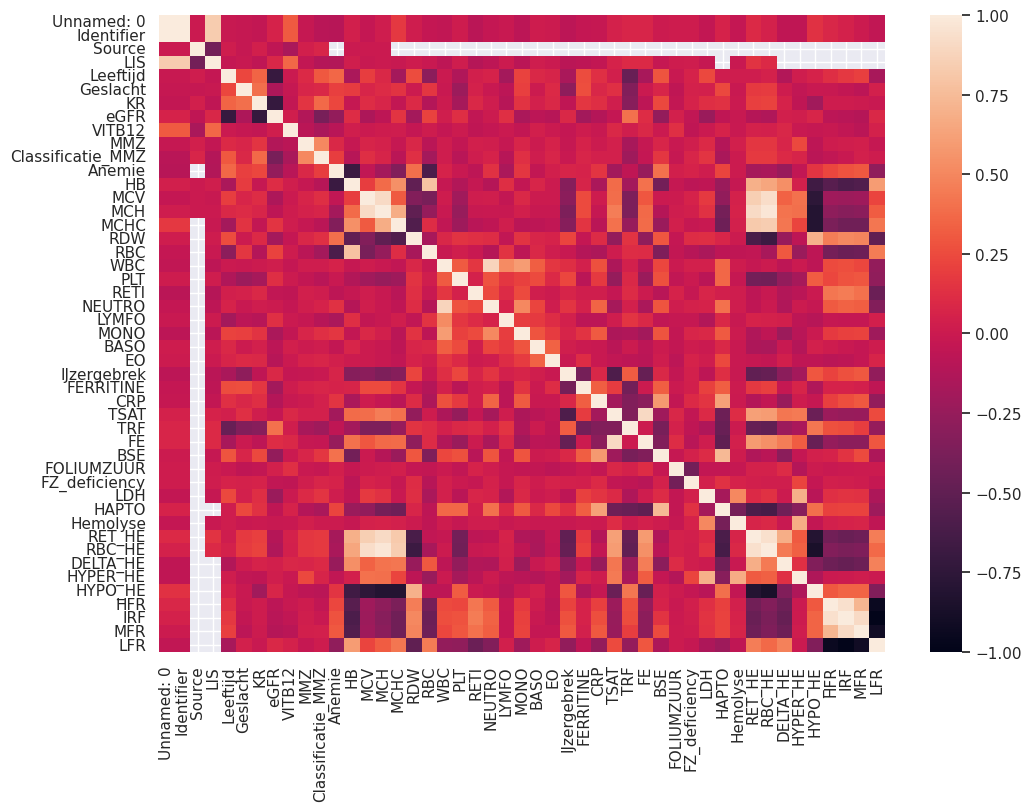

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mma_data_imputed = pd.read_csv("/content/quality_of_data/data_imputation.csv")

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure(2)

corr = mma_data.corr()
corr_fig = sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
fig = corr_fig.get_figure()
plt.show(block=False)


##**Additional Calculations and Insights:**
1. Anemia Classification:
    * Based on MCV, MCH
2. Inflammation and Infection Status:
    * High levels of CRP combined with WBC differentials can suggest acute inflammation or infection.
3. Kidney Disease Impact on MMA:
    * By correlating MMA levels with eGFR, one could determine if elevated MMA is due to impaired kidney function rather than just Vitamin B12 deficiency.
4. Comprehensive Anemia Workup:
    * Using the combination of hematological parameters, one can perform a full anemia workup, identifying the root cause (iron deficiency, folate deficiency, hemolysis, etc.).

In [80]:
import pandas as pd

# Define the function to classify anemia based on MCV and MCH
def classify_anemia_simple(mcv, mch):
    if pd.isna(mcv) or pd.isna(mch):
        return 'Unknown'
    elif mcv < 80:
        return 'Microcytic Anemia'
    elif 80 <= mcv <= 100:
        return 'Normocytic Anemia'
    else:
        return 'Macrocytic Anemia'

# Assuming your dataset is already loaded as `data`
# Apply the classification function across the dataset
anemia_classification = []

for index, row in mma_data_imputed.iterrows():
    anemia_classification.append(classify_anemia_simple(row['MCV'], row['MCH']))

# Add the new column 'Anemia_Classification' to the dataset
mma_data_imputed['Anemia_Classification'] = anemia_classification

# Display the first few rows to check the new column
print(mma_data_imputed[['MCV', 'MCH', 'Anemia_Classification']].head())


         MCV          MCH Anemia_Classification
0  90.300000  1767.000000     Normocytic Anemia
1  91.602585  1848.668171     Normocytic Anemia
2  91.602585  1848.668171     Normocytic Anemia
3  91.602585  1848.668171     Normocytic Anemia
4  91.602585  1848.668171     Normocytic Anemia


###**Vitamin B12 Deficiency:**

By analyzing both MMA and Vitamin B12 levels, we can assess whether a patient is likely deficient in Vitamin B12, which is essential for proper nerve function and red blood cell production. This analysis categorizes deficiency status based on defined thresholds and combined biomarker data.

 `[TODO: need to add reference]`

Steps:
- Define Thresholds:
  *  Vitamin B12 Deficiency: Levels below 200 pg/mL are considered deficient.
  *  Borderline Levels: Vitamin B12 levels between 200-300 pg/mL are borderline.
  *  Sufficient Levels: Levels above 300 pg/mL are generally sufficient.
  *  MMA Elevation: MMA levels above 0.4 μmol/L indicate potential deficiency.
  *  Extreme Cases: Vitamin B12 levels above 1000 pg/mL or MMA levels above 5000 μmol/L require special consideration.
[TODO: need to add reference]

- Classify Deficiency Based on Combined Analysis:
  *  Likely Deficient: Low Vitamin B12 (< 200 pg/mL) and elevated MMA (> 0.4 μmol/L).
  *  Possible Deficiency: Borderline Vitamin B12 (200-300 pg/mL) with elevated MMA.
  *  Normal: Sufficient Vitamin B12 (> 300 pg/mL) with normal MMA (≤ 0.4 μmol/L).
  High B12,
  *  Normal MMA: Vitamin B12 > 1000 pg/mL with normal MMA.
  *  Extreme MMA Level: MMA > 5000 μmol/L regardless of Vitamin B12 level.

 `[TODO: need to add reference]`

- Apply conditions to the dataset to determine their Vitamin B12 deficiency status.


In [89]:
# Define the thresholds
VITB12_DEFICIENCY_THRESHOLD = 200  # pg/mL
VITB12_EXTREME_HIGH_THRESHOLD = 1000  # pg/mL, for extremely high B12 levels
MMA_ELEVATION_THRESHOLD = 0.4  # μmol/L
MMA_EXTREME_HIGH_THRESHOLD = 5000  # μmol/L, for extremely high MMA levels

# Define conditions for deficiency status and extreme cases
conditions = [
    (mma_data_imputed['VITB12'] < VITB12_DEFICIENCY_THRESHOLD) & (mma_data_imputed['MMZ'] > MMA_ELEVATION_THRESHOLD),
    (mma_data_imputed['VITB12'] >= VITB12_DEFICIENCY_THRESHOLD) & (mma_data_imputed['VITB12'] <= 300) & (mma_data_imputed['MMZ'] > MMA_ELEVATION_THRESHOLD),
    (mma_data_imputed['VITB12'] > 300) & (mma_data_imputed['MMZ'] <= MMA_ELEVATION_THRESHOLD),
    (mma_data_imputed['VITB12'] > VITB12_EXTREME_HIGH_THRESHOLD) & (mma_data_imputed['MMZ'] < MMA_ELEVATION_THRESHOLD),
    (mma_data_imputed['MMZ'] > MMA_EXTREME_HIGH_THRESHOLD)
]

# Define corresponding labels for these conditions
choices = [
    'Likely Deficient',
    'Possible Deficiency',
    'Normal',
    'High B12, Normal MMA',
    'Extreme MMA Level'
]

# Apply the conditions and choices
mma_data_imputed['B12_Deficiency_Status'] = pd.Series(pd.Categorical(np.select(conditions, choices, default='Unknown')))

# Preview the updated classification with the new categories
print(mma_data_imputed[['VITB12', 'MMZ', 'B12_Deficiency_Status']])

## Save cleaned dataset
mma_data_imputed.to_csv('mma_data_B12_deficiency.csv')



       VITB12    MMZ B12_Deficiency_Status
0       235.0  190.0   Possible Deficiency
1       242.0  459.7   Possible Deficiency
2       196.0  238.2      Likely Deficient
3       142.0   71.6      Likely Deficient
4       353.0  103.9               Unknown
...       ...    ...                   ...
14247   159.0  316.0      Likely Deficient
14248   243.0  159.0   Possible Deficiency
14249   394.0  123.0               Unknown
14250   257.0  275.0   Possible Deficiency
14251   285.0  154.0   Possible Deficiency

[14252 rows x 3 columns]


In [91]:
# Count the number of "Unknown" classifications
unknown_count = mma_data_imputed['B12_Deficiency_Status'].value_counts().get('Unknown', 0)

# Calculate the total number of classifications
total_count = mma_data_imputed['B12_Deficiency_Status'].count()

# Calculate the percentage of "Unknown" classifications
unknown_percentage = (unknown_count / total_count) * 100

# Print the result
print(f"Number of 'Unknown' classifications: {unknown_count} ({unknown_percentage:.2f}%)")



Number of 'Unknown' classifications: 2724 (19.11%)
